<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [2]:
# AND gate
def AND(x, y):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = w1*x + w2*y
    if tmp <= theta:
        return 0
    else:
        return 1
    
print(AND(0, 0))
print(AND(1, 0))
print(AND(0, 1))
print(AND(1, 1))

0
0
0
1


In [3]:
# bias를 도입한 AND gate
def AND(x, y):
    w1, w2 = 0.5, 0.5
    b = -0.7
    tmp = w1*x + w1*y + b
    if tmp <= 0:
        return 0
    else:
        return 1

print(AND(0, 0))
print(AND(1, 0))
print(AND(0, 1))
print(AND(1, 1))

0
0
0
1


In [5]:
# 가중치에 어떤 값을 부여할지는 현재 인간의 몫!
def AND(x, y):
    x = np.array([x, y])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(x*w) + b
    if tmp <= 0:
        return 0
    else:
        return 1

def NAND(x, y):
    x = np.array([x, y])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(x*w) + b
    if tmp <= 0:
        return 0
    else:
        return 1
    
def OR(x, y):
    x = np.array([x, y])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(x*w) + b
    if tmp <= 0:
        return 0
    else:
        return 1
    
def XOR(x, y):
    s1 = NAND(x, y)
    s2 = OR(x, y)
    xor = AND(s1, s2)
    return xor

# XOR의 X는 Exclusive(배타적인=자기외는 거부.. 그러므로 1개만 1인것만 1로 출력! 둘다 동일하면 0을 출력)
print(XOR(0, 0))
print(XOR(0, 1))
print(XOR(1, 0))
print(XOR(1, 1))

0
1
1
0


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


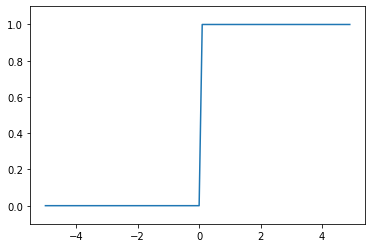

In [14]:
# 단층퍼셉트론의 함수인 계단함수 구현
import numpy as np
import matplotlib.pyplot as plt

def step_function(x):
    y = x > 0  # x에 np.array 넣으면 Boolean 인덱싱 적용됨
    return y.astype(int)

def step_function(x):
    return np.array(x > 0, dtype=int)


x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
print(y)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

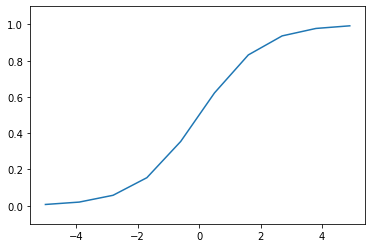

In [18]:
# 시그모이드 함수를 plot
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.arange(-5.0, 5.0, 1.1)
y = sigmoid(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

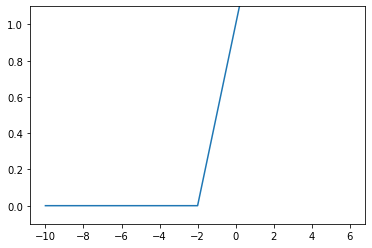

In [27]:
# Relu 활성화 함수 -> 입력이 음수인 것들은 차단!

def relu(x):
    return np.maximum(0, x)

x = np.arange(-10.0, 10.0, 4)
y = relu(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

In [36]:
# 행렬 곱(dot product)
a = np.array([[1,2],[3,4], [5,6]]) # shape(3,2)
b = np.array([[7,8,9], [10,11,12]]) # shape(2,3)

print(np.dot(a, b)) # shape(3, 3) -> (a, b) dot (b, a) => (a, a) shape
print()
print(np.matmul(a, b)) # np.matmul도 동일한 기능!

# A의 1번째 차원의 원소 수 = B의 0번째 차원의 원소 수 만족해야함!
A = np.array([[1,2], [3,4], [5,6]])  # shape(3, 2)
B = np.array([[1,2], [3,4]])  # shape(2, 2)

res = np.dot(A, B)
print(res, res.shape) # shape(3, 2) -> 곱한 결과의 shape = (A의 0번째 차원 수, B의 1번째 차원 수)

[[ 27  30  33]
 [ 61  68  75]
 [ 95 106 117]]

[[ 27  30  33]
 [ 61  68  75]
 [ 95 106 117]]
[[ 7 10]
 [15 22]
 [23 34]] (3, 2)


In [40]:
a = np.array([[1,2], [3,4], [5,6]]) # shape(3, 2)
b = np.array([1,2]) # shape(2,)

print(np.dot(a, b)) # shape(3,)
print(np.dot(b, a.T)) # shape(2, 3) dot (3,) => (3,)

[ 5 11 17]
[ 5 11 17]


In [42]:
# 신경망에서 행렬 곱 표현(활성함수, bias 생략)
x = np.array([1, 2]) # shape (2,)
w = np.array([[1, 2, 3], [3,4,5]]) # shape(2, 3)
y = np.dot(x, w) # shape (3,)
print(y, y.shape)

[ 7 10 13] (3,)


In [47]:
# 신경망 3층 Forward 구현하기
import numpy as np

def relu(x):
    return np.maximum(0, x)

def init_network():
    network = {}
    network['W1'] = np.random.rand(2, 3)
    network['b1'] = np.ones(3,)
    network['W2'] = np.random.rand(3, 2)
    network['b2'] = np.ones(2,)
    network['W3'] = np.random.rand(2, 1)
    network['b3'] = np.ones(1,)
    return network

def forward(network, x):
    w1, w2, w3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    # layers
    a1 = np.matmul(x, w1) + b1
    a2 = np.matmul(a1, w2) + b2
    a3 = np.matmul(a2, w3) + b3
    # activation
    out = relu(a3)
    
    return out

# shape 형상 과정 : (2, 2) x (2, 3) => (2, 3) x (3, 2) => (2, 2) x (2, 1) => 최종: (2, 1)
network = init_network()
x = np.array([[1, 2], [3, 4]])  
output = forward(network, x)
print(output, output.shape)

[[ 7.64685638]
 [12.20294257]] (2, 1)


In [11]:
# Softmax 활성함수 but array의 요소값이 너무 커지면 오버플로우 발생 
def softmax(a: np.array):
    exp_a = np.exp(a)
    exp_a_sum = np.sum(exp_a)
    y = exp_a / exp_a_sum
    
    return y

In [13]:
a = np.array([1010, 1000, 990])  # NaN 발생
print(softmax(a))

[nan nan nan]


/Users/younghun/opt/anaconda3/envs/venvforpython/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/younghun/opt/anaconda3/envs/venvforpython/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


In [16]:
# 오버플로우를 막기위한 Softmax 재구현 -> array 원소를 array 원소의 최댓값을 더하거나 빼서 방지(원소의 값 크기에 따라 더하거나 빼는 것 선택)
def softmax(a: np.array):
    max_a = max(a)
    exp_a = np.exp(a - max_a)
    exp_a_sum = np.sum(exp_a)
    y = exp_a / exp_a_sum
    return y

a = np.array([1010, 1000, 990])
print(softmax(a))

[9.99954600e-01 4.53978686e-05 2.06106005e-09]


In [30]:
import sys, os
sys.path.append(os.pardir)

from dataset.mnist import load_mnist
import numpy as np
from PIL import Image

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

img = x_train[5]
label = t_train[5
               ]
print(label)

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()
    
img = img.reshape(28, 28)
print(img.shape)

img_show(img)

2
(28, 28)


In [32]:
x_train.shape

(60000, 784)

In [39]:
from dataset.mnist import load_mnist
import numpy as np
import pickle

path = '/Users/younghun/Desktop/gitrepo/deep-learning-from-scratch/ch03'

def get_data():
    (X_train, y_train), (X_test, y_test) = load_mnist(flatten=True, normalize=True, one_hot_label=False)
    return X_test, y_test

def sigmoid(x):
    y = 1 / (1 + np.exp(-x))
    return y

def softmax(x):
    max_x = np.max(x)
    exp_x = np.exp(x - max_x)
    exp_x_sum = np.sum(exp_x)
    y = exp_x / exp_x_sum
    
    return y

def init_network():
    global path
    with open(os.path.join(path, 'sample_weight.pkl'), 'rb') as f: # 'rb'는 바이트 형식으로 데이터를 읽어옴
        network = pickle.load(f)
    return network

def predict(network, x):
    w1, w2, w3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.matmul(x, w1) + b1
    z1 = sigmoid(a1)
    a2 = np.matmul(z1, w2) + b2
    z2 = sigmoid(a2)
    a3 = np.matmul(z2, w3) + b3
    y = softmax(a3)
    
    return y

In [41]:
X_test, y_test = get_data()
network = init_network()

accuracy = 0
for i in range(len(X_test)):
    x = X_test[i]
    y_prob = predict(network, x)
    y_pred = np.argmax(y_prob)
    
    if y_pred == y_test[i]:
        accuracy += 1

print('Accuracy:', accuracy / len(X_test))

Accuracy: 0.9352


In [42]:
# 이번엔 배치로 묶어서 inference 하기
X_test, y_test = get_data()
network = init_network()

batch_size = 100
accuracy = 0
for i in range(0, len(X_test), batch_size):
    x = X_test[i:i+batch_size]
    y_prob = predict(network, x)
    y_pred = np.argmax(y_prob, axis=1) # 1번째 차원 축을 중심으로 argmax
    
    accuracy += np.sum(y_pred == y_test[i:i+batch_size])

print('Accuracy(Batch):', accuracy / len(X_test))

Accuracy(Batch): 0.9352


In [43]:
a = np.array([1,2,3])
b = np.array([4,5,6])
print(a + b)
print(a - b)
print(a * b)
print(a / b)

[5 7 9]
[-3 -3 -3]
[ 4 10 18]
[0.25 0.4  0.5 ]


In [50]:
from dataset.mnist import load_mnist
import numpy as np
import pickle

path = '/Users/younghun/Desktop/gitrepo/deep-learning-from-scratch/ch03'

def get_data():
    (X_train, y_train), (X_test, y_test) = load_mnist(flatten=True, normalize=True, one_hot_label=False)
    return X_test, y_test

def init_network():
    with open(os.path.join(path, 'sample_weight.pkl'), 'rb') as f:
        network = pickle.load(f)
        
    return network

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(x: np.array):
    max_x = np.max(x)
    exp_x = np.exp(x - max_x)
    exp_x_sum = np.sum(exp_x)
    y = exp_x / exp_x_sum
    
    return y

def forward(network, x):
    w1, w2, w3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    # Layer
    a1 = np.matmul(x, w1) + b1
    z1 = sigmoid(a1)
    a2 = np.matmul(z1, w2) + b2
    z2 = sigmoid(a2)
    a3 = np.matmul(z2, w3) + b3
    y = softmax(a3)
    
    return y

X_test, y_test = get_data()
network = init_network()
batch_size = 100
accuracy = 0

for i in range(0, len(X_test), batch_size):
    x = X_test[i:i+batch_size]
    y_proba = forward(network, x)
    y_pred = np.argmax(y_proba, axis=1)
    
    # Boolean 값으로 변환 -> 같으면 True, 틀리면 False
    accuracy += np.sum(y_pred == y_test[i:i+batch_size])

print('Accuracy(Mini-batch):', accuracy / len(X_test))

Accuracy(Mini-batch): 0.9352
